In [1]:
import os
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path
from shutil import copyfile
import tensorflow as tf

In [2]:
#mengimport ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#membuat training generator
TARGET_SIZE = (150,100)
BATCH_SIZE = 64

TRAINING_DIR = r'D:\astungkara\BrailleDataset\train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      validation_split = 0.2,
      fill_mode='nearest')

TESTING_DIR = r'D:\astungkara\BrailleDataset\test'
testing_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle = True
)

test_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 15559 images belonging to 35 classes.
Found 3290 images belonging to 35 classes.


In [5]:
#konstruksi model

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x100 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    # Fully Connected Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 98, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 36, 23, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 21, 64)        1

In [7]:
#compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
#training model
history = model.fit(train_generator, 
                    epochs=20, 
                    steps_per_epoch=len(train_generator), 
                    validation_data = test_generator, 
                    verbose = 2, 
                    validation_steps=len(test_generator)
)

Epoch 1/20


244/244 - 228s - loss: 3.2209 - accuracy: 0.1044 - val_loss: 2.1172 - val_accuracy: 0.5271 - 228s/epoch - 933ms/step
Epoch 2/20
244/244 - 78s - loss: 0.8904 - accuracy: 0.7956 - val_loss: 0.4632 - val_accuracy: 0.9036 - 78s/epoch - 318ms/step
Epoch 3/20
244/244 - 77s - loss: 0.4325 - accuracy: 0.8959 - val_loss: 0.2679 - val_accuracy: 0.9474 - 77s/epoch - 314ms/step
Epoch 4/20
244/244 - 72s - loss: 0.3447 - accuracy: 0.9120 - val_loss: 0.2760 - val_accuracy: 0.9474 - 72s/epoch - 295ms/step
Epoch 5/20
244/244 - 75s - loss: 0.2798 - accuracy: 0.9277 - val_loss: 0.1509 - val_accuracy: 0.9650 - 75s/epoch - 308ms/step
Epoch 6/20
244/244 - 73s - loss: 0.2252 - accuracy: 0.9418 - val_loss: 0.1388 - val_accuracy: 0.9641 - 73s/epoch - 301ms/step
Epoch 7/20
244/244 - 70s - loss: 0.2305 - accuracy: 0.9402 - val_loss: 0.1580 - val_accuracy: 0.9644 - 70s/epoch - 286ms/step
Epoch 8/20
244/244 - 75s - loss: 0.1994 - accuracy: 0.9483 - val_loss: 0.1208 - val_accuracy: 0.9708 - 75s/epoch -

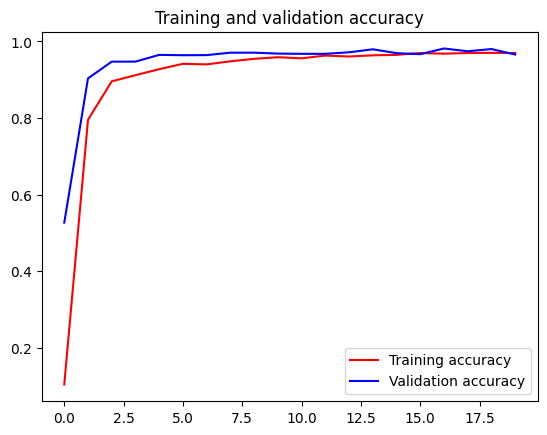

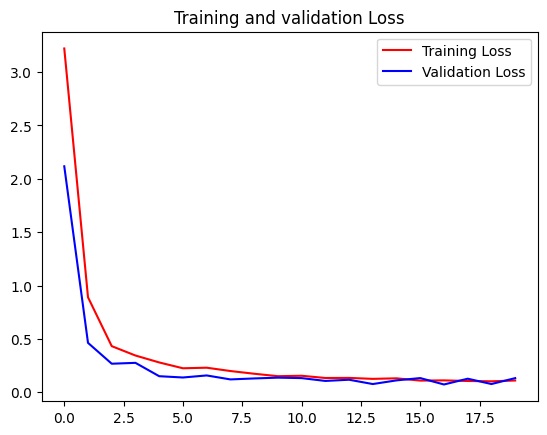

<Figure size 640x480 with 0 Axes>

In [10]:
#plot perubahan nilai accuracy dan loss pada tiap epoch saat training

import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [11]:
test_generator.class_indices

{'a': 0,
 'b': 1,
 'c': 2,
 'colon': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'koma': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'petik_satu': 18,
 'q': 19,
 'r': 20,
 's': 21,
 'semicolon': 22,
 'space': 23,
 't': 24,
 'tanda_hubung': 25,
 'tanda_seru': 26,
 'tanda_tanya': 27,
 'titik': 28,
 'u': 29,
 'v': 30,
 'w': 31,
 'x': 32,
 'y': 33,
 'z': 34}

In [12]:
model.save("cnn_braille.h5")

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
